In [1]:
# General Dependencies
import pandas as pd

# Visualizations

%matplotlib inline
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [2]:
# Read the data

try:
    df_brand17 = pd.read_csv('data/brand17.csv')
    df_brand18 = pd.read_csv('data/brand18.csv')
except:
    print (" Cannot find datasets brand17.csv and brand18.csv")
    exit()   

In [3]:
df_brand17 = df_brand17[(df_brand17.TotalSales < 63925 )]
df_brand18 = df_brand18[(df_brand18.TotalSales < 15370 )]

df_brand17.drop(['Brand'], axis=1,inplace=True)
df_brand18.drop(['Brand'], axis=1,inplace=True)

df_brand17.describe()

,NumOrders,TotalQuantity,TotalCost,TotalPrice,TotalSales,TotalProfit
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,11.050847,11.076271,1513.652542,2101.838983,2145.177966,493.067797
std,19.732765,19.754544,2309.659829,3184.114698,3281.401086,897.899106
min,1.000000,1.000000,1.000000,26.000000,26.000000,0.000000
25%,1.000000,1.000000,136.250000,223.000000,223.000000,46.875000
50%,3.000000,3.000000,508.500000,690.500000,690.500000,129.250000
75%,11.000000,11.750000,1873.500000,2548.500000,2548.500000,643.375000
max,124.000000,124.000000,12762.100000,16788.000000,16788.000000,5791.500000


In [4]:
df_brand18.describe()

,NumOrders,TotalQuantity,TotalCost,TotalPrice,TotalSales,TotalProfit
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,5.962963,6.166667,1314.029630,1849.166667,1889.370370,467.803704
std,7.662609,7.649763,1601.799585,2309.463964,2354.657282,726.566340
min,1.000000,1.000000,16.000000,42.000000,47.000000,7.000000
25%,1.000000,1.250000,138.500000,214.500000,263.750000,67.500000
50%,3.000000,3.500000,717.000000,1023.500000,1023.500000,178.000000
75%,6.000000,7.000000,1672.750000,2117.000000,2117.000000,502.000000
max,42.000000,42.000000,6492.000000,10355.000000,10355.000000,3386.000000


## Applying K-Means Clustering to Brand Expenses and Total Sales.

#### Study Correlation Profit Vs Cost of Operation

In [5]:
costs17=df_brand17.iloc[: , [5,2]].values
costs17.shape

(118, 2)

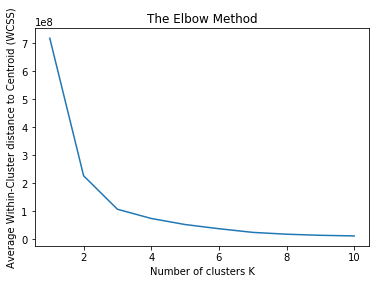

In [6]:
# Using the elbow method to find  the optimal number of clusters

wcss = []
for i in range(1, 11):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
  kmeans.fit(costs17)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')  
plt.show()

In [7]:
def Predictions(df,X, title):
    
    # Applying k-means to the mall dataset
    kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
    y_kmeans=kmeans.fit_predict(df)

    # Visualizing the clusters
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label='Small_Margin(c1)')
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label='Standard_Margin(c2)')
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='Good Margin(c3)')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', label='Centroids')
    plt.title(f"Clusters of Brands ({title} vs Profit)")
    plt.xlabel(f'Total {title} ')
    plt.ylabel('Total Profit')
    plt.legend(loc='upper left',  bbox_to_anchor=(1,1))
    plt.savefig('Images/Kmeans.png')
    plt.show()


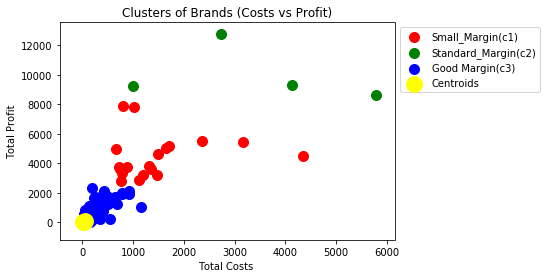

In [8]:
Predictions(df_brand17, costs17, 'Costs')

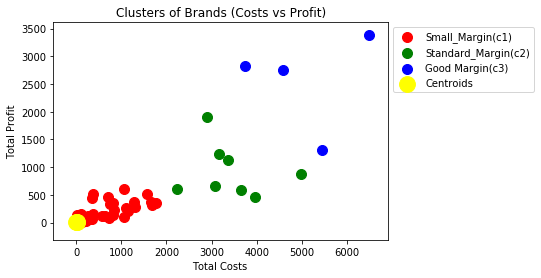

In [9]:
costs18=df_brand18.iloc[: , [2,5]].values
costs18.shape
Predictions(df_brand18, costs18, 'Costs')

#### Study Correlation Profit Vs Sales by Brand

In [10]:
sales17=df_brand17.iloc[: , [5,4]].values
sales17.shape

(118, 2)

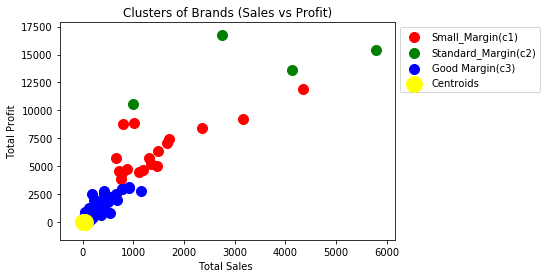

In [11]:
Predictions(df_brand17, sales17, 'Sales')

In [12]:
sales18=df_brand18.iloc[: , [5,4]].values
sales18.shape

(54, 2)

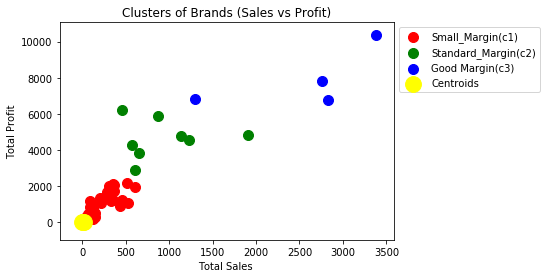

In [13]:
Predictions(df_brand18, sales18, 'Sales')